In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # used to make plots look nicerbb

# Problem 1b

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3',  8.0, 6.0)
mdl.node('4', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])

mdl.hinge(e['a'], n['1'])
mdl.hinge(e['b'], n['3'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['4'], ['y'])

mdl.numDOF()

[[9, 10, 11], [1, 2, 3], [4, 5, 6], [7, 12, 8]]

In [3]:
em.analysis.characterize(mdl)

m = 1
s = 0


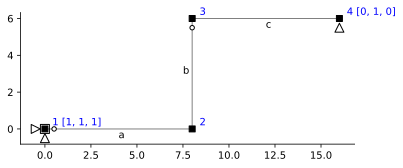

In [4]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [5]:
A = em.A_matrix(mdl)
A.f

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$
$a_1$,1.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.0
$a_2$,0.000000,-0.125,0.0,0.000000,0.000,0.0,0.0,0.0
$a_3$,0.000000,-0.125,1.0,0.000000,0.000,0.0,0.0,0.0
$b_1$,-0.000000,-1.000,0.0,0.000000,1.000,0.0,0.0,0.0
$b_2$,-0.166667,0.000,1.0,0.166667,-0.000,0.0,0.0,0.0
$b_3$,-0.166667,0.000,0.0,0.166667,-0.000,1.0,0.0,0.0
$c_1$,0.000000,0.000,0.0,-1.000000,-0.000,0.0,1.0,0.0
$c_2$,0.000000,0.000,0.0,-0.000000,0.125,1.0,0.0,0.0
$c_3$,0.000000,0.000,0.0,-0.000000,0.125,0.0,0.0,1.0


In [6]:
A_cm = A.c.ker / -0.561490
A_cm

,$1$
$1$,-0.000
$2$,1.000
$3$,0.125
$4$,-0.750
$5$,1.000
$6$,-0.125
$7$,-0.750
$8$,-0.125


1
2
3
4
5
6
7
8


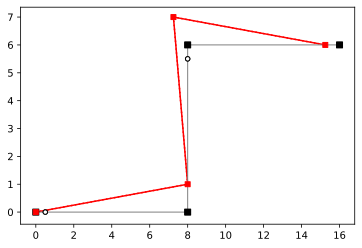

In [7]:
em.plot_U(mdl, A_cm, ax, scale=1)